In [5]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twit-comment/vall.csv
/kaggle/input/stopwords/stopwords


In [6]:
import pandas as pd
import nltk
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



url = "../input/twit-comment/vall.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = read_csv(url)

from nltk.corpus import stopwords

from stop_words import get_stop_words

stop=stopwords.words("english")

stop.extend(get_stop_words("en"))

df['text']=df.text.apply(str)

df['text']=df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))#supprimer les stopwords

df['text'].head()

print(df['text'].head())


0          well make happen third world war 2
1                         US terrorist nation
2                                waiting WW3😊
3    Remember war business profits must made.
4                   Call Duty looks brilliant
Name: text, dtype: object


In [7]:
import numpy as np
df['text'] = df['text'].replace(r'nan+', '', regex=True).replace(r'nan+', '', regex=True)
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)
print(df['text'])

0                      well make happen third world war 2
1                                     US terrorist nation
2                                            waiting WW3😊
3                Remember war business profits must made.
4                               Call Duty looks brilliant
                              ...                        
3472    Americans stupidest people Earth. feel bad peo...
3473                       Muslim end war ends peace come
3474                                     Can’t use tasers
3475               Trump old mad man, man loose charector
3476                          someone explain Qassam was?
Name: text, Length: 3475, dtype: object


In [8]:
#Remove punctuation
import string
def remove_punctuation(text):
    no_punct="".join([c for c in text if c not in string.punctuation])
    return no_punct
df['text']=df['text'].astype(str)
df['text']=df['text'].apply(lambda x: remove_punctuation(x))
df['text']

0                      well make happen third world war 2
1                                     US terrorist nation
2                                            waiting WW3😊
3                 Remember war business profits must made
4                               Call Duty looks brilliant
                              ...                        
3472    Americans stupidest people Earth feel bad peop...
3473                       Muslim end war ends peace come
3474                                     Can’t use tasers
3475                Trump old mad man man loose charector
3476                           someone explain Qassam was
Name: text, Length: 3475, dtype: object

In [9]:
import nltk
from nltk.tokenize import word_tokenize 
x1=df.text.str.cat(sep=' ')
tokens=word_tokenize(x1)
tokens
#rendre les mots en muniscule
tokens=[x.lower()for x in tokens]
tokens

['well',
 'make',
 'happen',
 'third',
 'world',
 'war',
 '2',
 'us',
 'terrorist',
 'nation',
 'waiting',
 'ww3😊',
 'remember',
 'war',
 'business',
 'profits',
 'must',
 'made',
 'call',
 'duty',
 'looks',
 'brilliant',
 'amerika',
 'power',
 'full',
 'god',
 'bles',
 'war',
 'v6',
 'challenger',
 'even',
 'worth',
 'give',
 'hellcat',
 'stay',
 'world',
 'war',
 '3',
 'began',
 '😡',
 'ni',
 'saw',
 'many',
 'super',
 'stupid',
 'comments',
 'get',
 'many',
 'thumbs',
 'ass',
 'thought',
 'put',
 'stupid',
 'comment',
 'probably',
 'get',
 'lot',
 'thumbs',
 'too',
 'worst',
 'one',
 'comment',
 'got',
 'thumbs',
 'asss',
 'iranian',
 'general',
 'got',
 'killed',
 'focking',
 'idiot',
 'whole',
 'issue',
 'killing',
 'see',
 'focking',
 'stupid',
 'public',
 'trumphe',
 'dosent',
 'undrestand',
 'it',
 'isnt',
 'hollywood',
 'american',
 'soldiers',
 'hast',
 'experience',
 'war',
 'iran',
 'iraglibanon',
 'syrien',
 'long',
 'experience',
 'dont',
 'affraid',
 'die',
 'just',
 'kil

In [10]:
from nltk.probability import FreqDist
fdistToken = FreqDist(tokens)
fdistToken

FreqDist({'war': 648, 'iran': 424, 'us': 378, 'trump': 352, 'god': 299, 'people': 276, '’': 269, 'world': 259, 'america': 244, 'usa': 216, ...})

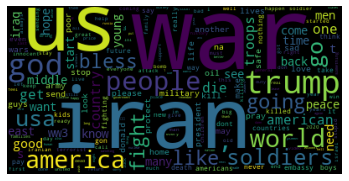

In [11]:
#stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(fdistToken)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
#Eliminer les stopwords
f=open("../input/stopwords/stopwords","r")
li=f.readlines()
for i in range(len(li)):
    li[i]=li[i].strip()
df['text']= df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (li)]))

In [13]:
x2=df.text.str.cat(sep=' ')
tokens2=word_tokenize(x2)
tokens2
fdistToken2 = FreqDist(tokens2)
fdistToken2


FreqDist({'war': 557, 'Iran': 286, '’': 269, 'people': 258, 'US': 242, 'God': 240, 'Trump': 221, 'world': 216, 'America': 198, 'soldiers': 187, ...})

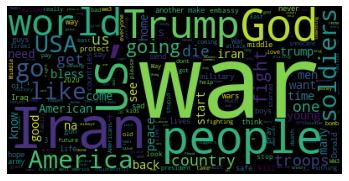

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(fdistToken2)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
import string
def remove_tag(text):
    no_tag=" ".join([c for c in text.split() if c.startswith('@')==False])
    return no_tag
df['text']=df['text'].apply(lambda x:remove_tag(x))
df['text']

0                      well make happen third world war 2
1                                     US terrorist nation
2                                            waiting WW3😊
3                 Remember war business profits must made
4                               Call Duty looks brilliant
                              ...                        
3472    Americans stupidest people Earth feel bad peop...
3473                       Muslim end war ends peace come
3474                                     Can’t use tasers
3475                Trump old mad man man loose charector
3476                               someone explain Qassam
Name: text, Length: 3475, dtype: object

In [16]:
import re
def remove_digits(input_text):
        return re.sub('\d+', '', input_text)
df['text']=df['text'].apply(lambda x:remove_digits(x))
df['text']

0                       well make happen third world war 
1                                     US terrorist nation
2                                             waiting WW😊
3                 Remember war business profits must made
4                               Call Duty looks brilliant
                              ...                        
3472    Americans stupidest people Earth feel bad peop...
3473                       Muslim end war ends peace come
3474                                     Can’t use tasers
3475                Trump old mad man man loose charector
3476                               someone explain Qassam
Name: text, Length: 3475, dtype: object

In [17]:
#Stemming
from nltk.stem.porter import *
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))
df['text'].head(10)

0                     well make happen third world war
1                                  US terrorist nation
2                                             wait ww😊
3                     rememb war busi profit must made
4                             call duti look brilliant
5                           amerika power full god ble
6                                                  war
7              v challeng even worth give hellcat stay
8    world war began 😡 nI saw mani super stupid com...
9    trumph dosent undrestand isnt hollywood americ...
Name: text, dtype: object

In [18]:
from textblob import TextBlob

def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity']= df.text.apply(detect_polarity)
df[['text' , 'polarity']]

,text,polarity
0,well make happen third world war,0.0000
1,US terrorist nation,0.0000
2,wait ww😊,0.0000
3,rememb war busi profit must made,0.0000
4,call duti look brilliant,0.9000
...,...,...
3472,american stupidest peopl earth feel bad peopl ...,-0.3500
3473,muslim end war end peac come,0.0000
3474,can’t use taser,0.0000
3475,trump old mad man man loos charector,-0.2625


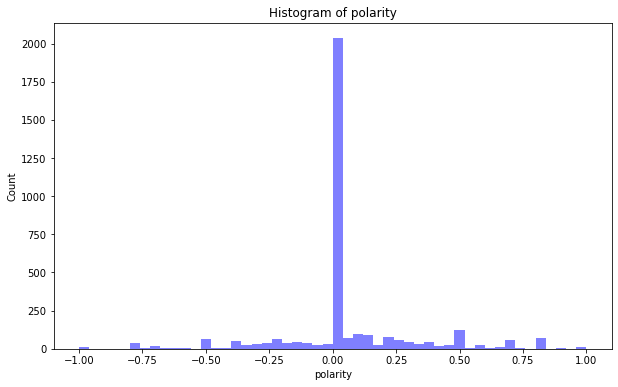

In [19]:
import matplotlib.pyplot as plt
num_bins = 50

plt.figure(figsize=(10,6))

n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
df['text']

plt.xlabel('polarity')

plt.ylabel('Count')

plt.title('Histogram of polarity')

plt.show();


In [20]:
df.loc[ (df.polarity < 0), 'polarity'] = -1

df.loc[ (df.polarity >0), 'polarity'] = 1


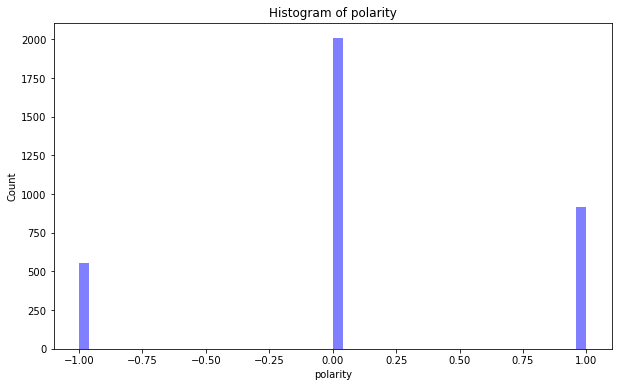

In [21]:
import matplotlib.pyplot as plt
num_bins = 50

plt.figure(figsize=(10,6))

n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)

plt.xlabel('polarity')

plt.ylabel('Count')

plt.title('Histogram of polarity')

plt.show();


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
coutvect=CountVectorizer(max_features=10)
x=coutvect.fit_transform(df['text']).toarray()
coutvect

CountVectorizer(max_features=10)

In [23]:
from sklearn.model_selection import train_test_split
y=df['polarity']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB()
clf1.fit(x_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

y_pred=clf1.predict(x_test)
results = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(y_test, y_pred) )

print ('Report : ')

print (classification_report(y_test, y_pred))

Confusion Matrix :
[[  0 106   7]
 [  0 403   3]
 [  0 172   4]]
Accuracy Score : 0.5856115107913669
Report : 
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       113
         0.0       0.59      0.99      0.74       406
         1.0       0.29      0.02      0.04       176

    accuracy                           0.59       695
   macro avg       0.29      0.34      0.26       695
weighted avg       0.42      0.59      0.44       695



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
tv=TfidfVectorizer(min_df=0.05,max_df=0.5,max_features=1500,stop_words = 'english')
X = tv.fit_transform(df['text'])
vocab=tv.get_feature_names()


In [26]:
from sklearn import preprocessing
loprog = preprocessing.LabelEncoder()
r=loprog.fit_transform(df['polarity'])

from scipy.sparse import hstack
import numpy as np
X_train_dtm = hstack((X,np.array(r)[:,None]))
r

array([1, 1, 1, ..., 1, 0, 1])

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train_dtm,df['polarity'],random_state=20)

In [28]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')

svclassifier.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

y_pred = svclassifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

results = confusion_matrix(Y_test, y_pred)

print ('Confusion Matrix :')

print(results)

print ('Accuracy Score :',accuracy_score(Y_test, y_pred) )

print ('Report : ')

print (classification_report(Y_test, y_pred))

Confusion Matrix :
[[146   0   0]
 [  0 484   0]
 [  0   0 239]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       146
         0.0       1.00      1.00      1.00       484
         1.0       1.00      1.00      1.00       239

    accuracy                           1.00       869
   macro avg       1.00      1.00      1.00       869
weighted avg       1.00      1.00      1.00       869

